<a href="https://colab.research.google.com/github/dlvvkfl88/MSAISCHOOL/blob/main/MS_AI_SCHOOL_54%EC%9D%BC%EC%B0%A8_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%9D%BC%EB%B2%A8%EB%A7%815.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

/root


In [96]:
from typing import Any
import torch
import os
import glob
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

def is_grayscale(img):
    return img.mode == 'L'

class CustomImageDataset(Dataset):
    def __init__(self, image_paths, transform = None):
        self.image_paths = glob.glob(os.path.join(image_paths, "*", "*", "*.jpg"))
        self.transform = transform
        self.label_dict = {"dew": 0, "fogsmog": 1, "frost": 2, "glaze": 3, "hail": 4,
                           "lightning": 5, "rain": 6, "rainbow": 7, "rime": 8, "sandstorm": 9,
                           "snow": 10}

    def __getitem__(self, index):
        image_path: str = self.image_paths[index]
        image = Image.open(image_path).convert("RGB")

        if not is_grayscale(image):
            folder_name = image_path.split("/")
            folder_name = folder_name[5]

            label = self.label_dict[folder_name]

            if self.transform:
                image = self.transform(image)

            return image, label

        else:
            print(f"{image_path} 파일은 흑백 이미지입니다.")

    def __len__(self):
        return len(self.image_paths)


if __name__ == "__main__":
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()
    ])

    image_paths = './sample_data_01/'
    dataset = CustomImageDataset(image_paths, transform=transform)

    data_loader = DataLoader(dataset, 32, shuffle=True)

    for images, labels in data_loader:
        print(f"Data and label : {images}, {labels}")
        exit()

ValueError: ignored

In [97]:
from typing import Any
import torch
import os
import glob
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

In [103]:
class HeightWeightDataset(Dataset):
  def __init__(self, csv_path):
    self.data = []

    with open(csv_path , 'r', encoding ='utf-8') as f :
      next(f) # 맨위에 속성이름 무시하고 그 다음줄
      for line in f:
        _, height , weight = line.strip().split(",")
        height = float(height) # 위에식으로 바꾸면 문자열이라 실수로
        weight = float(weight)
        convert_to_kg_data = round(self.convert_to_kg(weight),2)
        convert_to_cm_data = round(self.inch_to_cm(height),1)
        self.data.append([convert_to_kg_data,convert_to_cm_data])



  # pytorch는 텐서만 받아서 텐서로변경 데이터로더
  def __getitem__(self,index):
    data = torch.tensor(self.data[index], dtype=torch.float)
    return data

  def __len__(self):
    return len(self.data)



  def convert_to_kg(self, weight_lb):
    return weight_lb * 0.453592

  def inch_to_cm(self, inch):
    return inch * 2.54




if __name__ == "__main__":
  dataset = HeightWeightDataset("/content/sample_data/hw_200.csv")
  dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

  for batch in dataloader:

    x = batch[:,0].unsqueeze(1)
    y = batch[:,1].unsqueeze(1)

    print(type(x))

    print(x,y)


tensor([[57.8200]]) tensor([[172.8000]])
tensor([[64.3200]]) tensor([[169.7000]])
tensor([[49.8400]]) tensor([[163.6000]])
tensor([[55.8100]]) tensor([[171.9000]])
tensor([[58.8600]]) tensor([[173.5000]])
tensor([[58.5800]]) tensor([[167.5000]])
tensor([[55.9300]]) tensor([[174.5000]])
tensor([[62.9500]]) tensor([[182.9000]])
tensor([[54.3800]]) tensor([[167.1000]])
tensor([[60.2100]]) tensor([[172.]])
tensor([[51.9600]]) tensor([[172.1000]])
tensor([[59.1300]]) tensor([[170.4000]])
tensor([[60.1800]]) tensor([[174.8000]])
tensor([[62.3100]]) tensor([[172.6000]])
tensor([[60.1400]]) tensor([[173.4000]])
tensor([[63.9100]]) tensor([[171.1000]])
tensor([[64.6200]]) tensor([[175.4000]])
tensor([[58.7400]]) tensor([[168.8000]])
tensor([[67.0800]]) tensor([[178.3000]])
tensor([[64.8500]]) tensor([[174.4000]])
tensor([[66.0400]]) tensor([[176.9000]])
tensor([[58.8400]]) tensor([[170.7000]])
tensor([[52.4900]]) tensor([[175.5000]])
tensor([[56.6400]]) tensor([[165.6000]])
tensor([[52.5900]]) 

# JSON 커스텀 데이터셋

In [104]:
from typing import Any
import torch
import os
import glob
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

In [110]:
import json
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
import os

class JsonCustomDataset(Dataset):
    def __init__(self, json_path, transform=None):
        self.transform = transform
        with open(json_path, 'r', encoding='utf-8') as f:
            self.data = json.load(f)

    def __getitem__(self, index):
        img_path = self.data[index]['filename']
        img_path = os.path.join("이미지 폴더", img_path)

        # image = Image.open(img_path)

        bboxes = self.data[index]['ann']['bboxes']
        labels = self.data[index]['ann']['labels']

        # if self.transform:
            # image = self.transform(image)

        return img_path, {'boxes': bboxes, 'labels': labels}

    def __len__(self):
        return len(self.data)


if __name__ == "__main__":
    dataset = JsonCustomDataset("/content/sample_data/test.json", transform=None)

    for item in dataset:
        print(f"Data of dataset : {item}")

Data of dataset : ('이미지 폴더/image_001.jpg', {'boxes': [[10, 10, 50, 50], [100, 100, 200, 200]], 'labels': [0, 1]})
Data of dataset : ('이미지 폴더/image_002.jpg', {'boxes': [[20, 20, 60, 60], [300, 300, 400, 400]], 'labels': [1, 2]})
Data of dataset : ('이미지 폴더/image_003.jpg', {'boxes': [[30, 30, 60, 60], [300, 300, 400, 400]], 'labels': [1, 2]})
Data of dataset : ('이미지 폴더/image_004.jpg', {'boxes': [[10, 10, 60, 60], [300, 300, 400, 400]], 'labels': [1, 2]})


In [114]:
from typing import Any
import torch
import os
import glob
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import cv2

import albumentations as A
from albumentations.pytorch import ToTensorV2

class AlbumentationsDataset(Dataset):
  def __init__(self, file_paths,labels,transform= None) :
    self.file_paths = file_paths
    # 이번 예시에서는 간추린 파일 몇개 만 직접 사용
    # self.file_lists =os.listdir(file_paths) 원래인거필요
    self.labels = labels
    self.transform = transform

  def __getitem__(self, index):
    label = self.labels[index]
    file_path = self.file_paths[index]

    image = cv2.imread(file_path)

    image = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)
    if self.transform:
      augmented = self.transform(image = image)
      image = augmented['image']

    return image, label

  def __len__(self):
    return len(self.file_paths)


if __name__ =="__main__":
  albumentations_transform = A.Compose([
      A.Resize(256,256),
      A.RandomCrop(224,224),
      A.HorizontalFlip(),
      A.Normalize(
          mean = [0.485, 0.456,0.406], # 그냥 논문 굳어진값
          std = [0.229,0.224,0.225]
      ),
      ToTensorV2()

  ])
  dataset = AlbumentationsDataset(
      ["/content/drive/MyDrive/train/dew/2208.jpg",
       "/content/drive/MyDrive/train/fogsmog/4075.jpg",
       "/content/drive/MyDrive/train/frost/3600.jpg"],
      [0,1,2],
  )

  for image , label in dataset:
    print(f"Data of dataset: {image},{label}")

Data of dataset: [[[ 77 120   2]
  [ 78 121   3]
  [ 77 120   2]
  ...
  [ 47 105   2]
  [ 48 106   3]
  [ 47 105   2]]

 [[ 75 118   0]
  [ 76 119   1]
  [ 75 118   0]
  ...
  [ 48 106   3]
  [ 48 106   3]
  [ 46 104   1]]

 [[ 75 118   0]
  [ 75 118   0]
  [ 76 119   1]
  ...
  [ 49 106   3]
  [ 48 105   2]
  [ 47 104   1]]

 ...

 [[ 11  49   0]
  [ 10  48   0]
  [ 11  49   0]
  ...
  [ 56 113   0]
  [ 55 113   0]
  [ 55 113   0]]

 [[ 11  49   0]
  [  9  47   0]
  [ 10  48   0]
  ...
  [ 56 113   0]
  [ 55 113   0]
  [ 55 113   0]]

 [[ 11  49   0]
  [  9  47   0]
  [ 10  48   0]
  ...
  [ 55 111   0]
  [ 54 112   0]
  [ 54 112   0]]],0
Data of dataset: [[[179 179 179]
  [179 179 179]
  [180 180 180]
  ...
  [215 215 215]
  [214 214 214]
  [214 214 214]]

 [[180 180 180]
  [181 181 181]
  [182 182 182]
  ...
  [215 215 215]
  [214 214 214]
  [214 214 214]]

 [[179 179 179]
  [181 181 181]
  [182 182 182]
  ...
  [215 215 215]
  [213 213 213]
  [213 213 213]]

 ...

 [[148 148 148]


## Imagaug 라이브러리 실습

PIP INSTALL IMGAUG 설치해야함


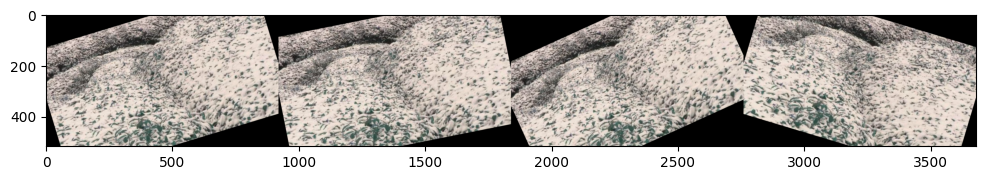

In [122]:
import numpy as np
import imgaug.augmenters as iaa # 보통 iaa로 줄여서 함
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

image = cv2.imread("/content/drive/MyDrive/train/snow/0830.jpg")

images = [image, image, image, image]

rotate = iaa.Affine(rotate=(-25,25)) # 이사이에서 랜덤으로 회전
images_aug = rotate(images = images)
#올바르게 로드
# cv2_imshow(np.hstack(images_aug))
# cv2.waitKey()
# cv2.destroyAllWindows()

plt.figure(figsize=(12,12))
plt.imshow(np.hstack(images_aug))
plt.show()

# Crop

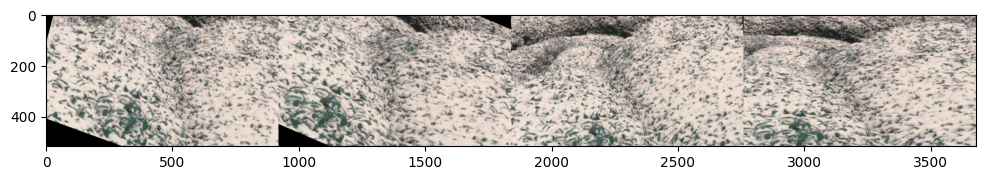

In [125]:
crop = iaa.Crop(percent=(0, 0.2)) # 0에서 0.2만큼 비율로 자르는것

images_aug01 = crop(images= images)
# plt.figure(figsize=(12,12))
# plt.imshow(np.hstack(images_aug01))
# plt.show()
#############
## 두개 한번에 적용#####
rotate_crop = iaa.Sequential([ # A.Compose 대신 iaa.Sequential 을 씀
    iaa.Affine(rotate=(-25,25)),
    iaa.Crop(percent=(0, 0.2))
],random_order = True) # 순서아닌 crop 먼저가 될수있음

images_aug02 = rotate_crop(images=images)

plt.figure(figsize=(12,12))
plt.imshow(np.hstack(images_aug02))
plt.show()

## iaa.OneOf 쓰기

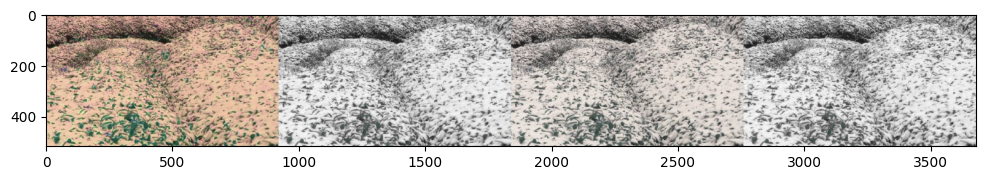

In [127]:
seq = iaa.OneOf([ # A.Compose 대신 iaa.Sequential 을 씀
    iaa.Grayscale(alpha=(0.0,1.0)),
    iaa.AddToSaturation((-50,50))
]) # 순서아닌 crop 먼저가 될수있음

images_aug04 = seq(images=images)

plt.figure(figsize=(12,12))
plt.imshow(np.hstack(images_aug04))
plt.show()

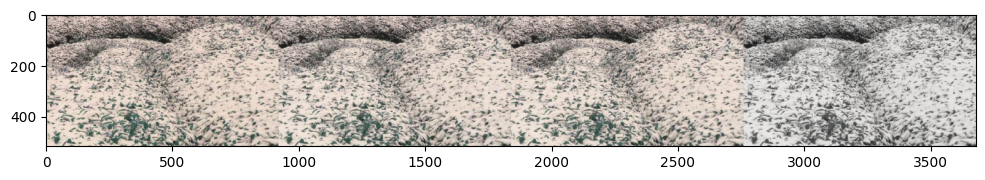

In [128]:
seq = iaa.OneOf([ # A.Compose 대신 iaa.Sequential 을 씀
    iaa.Sometimes(
        0.6, # 이게 0.6확률로 발동
        iaa.AddToSaturation((-50,50))
    ),
    iaa.Sometimes(
        0.2, # 이게 0.6확률로 발동
        iaa.Grayscale(alpha=(0.0,1.0))
    ),


]) # 순서아닌 crop 먼저가 될수있음

images_aug05 = seq(images=images)

plt.figure(figsize=(12,12))
plt.imshow(np.hstack(images_aug05))
plt.show()

In [133]:
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
import imgaug.augmenters as iaa
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

Files already downloaded and verified


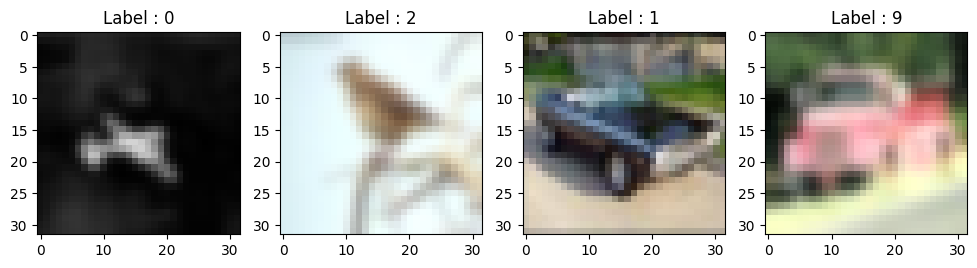

In [134]:

def imgaug_transform(image: torch.Tensor):
    seq = iaa.Sequential([
        iaa.Fliplr(0.5),
        iaa.GaussianBlur(sigma=(0, 1.0)),
        iaa.Multiply((0.8, 1.2))
    ])
    image_np = image.permute(1, 2, 0).numpy()
    image_aug = seq(image=image_np)
    image_aug_copy = image_aug.copy()
    image_aug_tensor = torch.from_numpy(image_aug_copy).permute(2, 0, 1)
    return image_aug_tensor

def transform_data(image):
    tensor = transforms.ToTensor()(image)
    transformed_tensor = imgaug_transform(tensor)
    return transformed_tensor

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_data)

batch_size = 4
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

for images, labels in train_dataloader:
    fig, axes = plt.subplots(1, batch_size, figsize=(12, 4))

    for i in range(batch_size):
        image = images[i].permute(1, 2, 0).numpy()
        axes[i].imshow(image)
        axes[i].set_title(f"Label : {labels[i]}")

    plt.show()
    break


In [ ]:
_

1 1 
2


KeyboardInterrupt: ignored

1 1 
2


KeyboardInterrupt: ignored